# 2023_01_30_Problema 1

En la siguiente tabla se presenta una muestra de entrenamiento no linealmente separable en $\mathbb{R}^2$ y los correspondientes multiplicadores de Lagrange óptimos obtenidos al entrenar una máquina de vectores soporte con esta muestra (y C=10):
$$\begin{array}{|l||rrrrrrrr|}
\hline
 i     &  1 &  2 &  3 &  4 &  5 &  6 &  7 &  8 \\
\hline
 x_{i1} &  1 &  3 &  2 &  4 &  3 &  2 &  4 &  4 \\
 x_{i2} &  4 &  1 &  3 &  2 &  4 &  5 &  4 &  3 \\
\hline
\text{Clase} & +1 & +1 & +1 & +1 & -1 & -1 & +1 & -1 \\
\hline
\hline
 \alpha^\star_i & 
        3.38 & ~0 & ~0 & \!\!5.75 & 9.13 & ~~0 & ~~10 & 10\\
\hline
\end{array}$$

Se pide:
1. Obtener la función discriminante lineal correspondiente.
2. Representar gráficamente la frontera lineal de separación entre clases y las muestras de entrenamiento, indicando cuáles son vectores soporte. Representar los márgenes.
3. Calcular las tolerancias óptimas.
4. Clasificar la muestra $(5,5)^t$.

## Solución

**Pesos de la función discriminante:**

$\boldsymbol{\theta}^\star = c_1~\alpha^\star_1~\boldsymbol{x_1} 
              + c_4~\alpha^\star_4~\boldsymbol{x_4} 
              + c_5~\alpha^\star_5~\boldsymbol{x_5} 
              + c_7~\alpha^\star_7~\boldsymbol{x_7}
              + c_8~\alpha^\star_8~\boldsymbol{x_8} $

$\theta^*_1~=~(+1)~(1)~(3.38)+(+1)~(4)~(5.75)+(-1)~(3)~(9.13)+(+1)~(4)~(10)+(-1)~(4)~(10)~\approx~-1.0$

$\theta^*_2~=~(+1)~(4)~(3.38)+(+1)~(2)~(5.75)+(-1)~(4)~(9.13)+(+1)~(4)~(10)+(-1)~(3)~(10)~=~-1.5$

Usando el vector soporte $\boldsymbol{x_4}$ (que verifica la condición : $0 < \alpha_4^* < C$)

$\theta^\star_0 = c_4-{\boldsymbol{\theta}^\star}^t\boldsymbol{x_4} 
               = 1 - ((-1.0)~(4) + (-1.5)~(2)) = 8.0$ 

**Frontera de separación y representación gráfica:**

Ecuación de la frontera lineal de separación:
$~ 8.0 - 1.0~x_1 -  1.5~x_2 ~=~ 0 ~~\rightarrow~~$ 
$  x_2 \approx - 0.67~x_1 + 5.3$

Los vectores de entrenamiento son todos los de la tabla.  De ellos,
los vectores soporte son: $(1,4)^t, (4,2)^t, (3,4)^t, (4,4)^t\,(4,3)^t$.

Representación gráfica:
<div><img src="2023_01_30_Problema 1.png" width=400></div>

**Cálculo de las tolerancias:**
* La tolerancia de las muestras 1, 2, 3, 4, 5 y 6 es 0.
* La tolerancia de la muestra 7 es: $1-c_7({\theta^*}^tx_7+\theta_0)=3.0$
* La tolerancia de la muestra 8 es: $1-c_8({\theta^*}^tx_8+\theta_0)=0.5$

**Clasificación de la muestra $(5,5)^t:$**

El valor de la función discriminante para este vector es:
$~\theta^*_0+\theta^*_1~1+\theta^*_2~1~=-4.5 < 0 ~\Rightarrow\,$ clase -1.


## Solución con sklearn

In [1]:
import numpy as np; np.set_printoptions(precision=4, suppress=True); from sklearn import svm
X = np.array([[1, 4], [3, 1], [2, 3], [4, 2], [3, 4], [2, 5], [4, 4], [4, 3]]).astype(np.float32)
y = np.array([1, 1, 1, 1, -1, -1, 1, -1]).astype(np.int32); N, D = X.shape
C = 10.0; clf = svm.SVC(C=C, kernel='linear').fit(X, y)
a = np.zeros(N); a[clf.support_] = clf.dual_coef_ * y[clf.support_]; print('alfa: ', a)
w = clf.coef_[0]; w0 = clf.intercept_ [0]; m = 2.0/np.linalg.norm(w);
t = np.zeros(N); t[clf.support_] = 1.0 - y[clf.support_] * (clf.support_vectors_ @ w + w0)
print('w:', w, ' w0:', round(w0, 4), ' margen:', round(m, 4), '\nt:', t)
Z = [[5, 5]]; print('Clase de', Z[0],':',clf.predict(Z)[0])

alfa:  [ 3.3746  0.      0.      5.7496  9.1242  0.     10.     10.    ]
w: [-0.9995 -1.4993]  w0: 7.9963  margen: 1.1099 
t: [0.0003 0.     0.     0.0003 0.0006 0.     2.9989 0.5004]
Clase de [5, 5] : -1


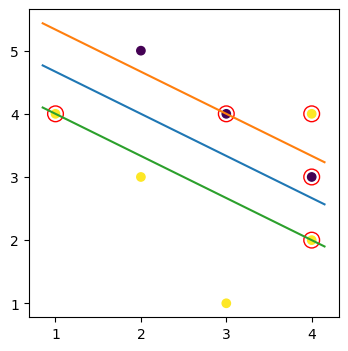

In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(4, 4)); ax.scatter(*X.T, c=y)
x1 = np.linspace(*ax.get_xlim()); x2 = (-w[0]*x1 - w0)/w[1]
ax.plot(x1, x2, x1, x2 - 1/w[1], x1, x2 + 1/w[1])
ax.scatter(*clf.support_vectors_.T, s=128, facecolors='none', edgecolors='r');